<a href="https://colab.research.google.com/github/mayujie/Predicting_the_house_prices/blob/main/Predicting_the_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the house prices

Real Estate Valuation Data Set

This research aimed at predicting housing prices within New Taipei City
Data downloaded from: https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set
(https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)


In [ ]:
# Download dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx

--2020-12-09 12:27:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32717 (32K) [application/x-httpd-php]
Saving to: ‘Real estate valuation data set.xlsx’

Real estate valuati 100%[===================>]  31.95K  --.-KB/s    in 0.07s   

2020-12-09 12:27:14 (483 KB/s) - ‘Real estate valuation data set.xlsx’ saved [32717/32717]



# Section Order
- Exploratory Data Analysis (Data understanding)
- Normalization (Data preparation)
- Train-Test Split (Validation)
- Linear Regression (Algorithm)
- R2 (Evaluation)

# Exploratory Data Analysis (Data understanding)

In [ ]:
# Look up the packages and data
import pandas as pd
import seaborn as sns
import sklearn

In [ ]:
# Loading the data
housingdata = pd.read_excel("/content/Real estate valuation data set.xlsx")

# Example on how to run data from URL link (commented out)
##housingdata=pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx")

# Examing a few top rows
housingdata

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
# Summary statistics
housingdata.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


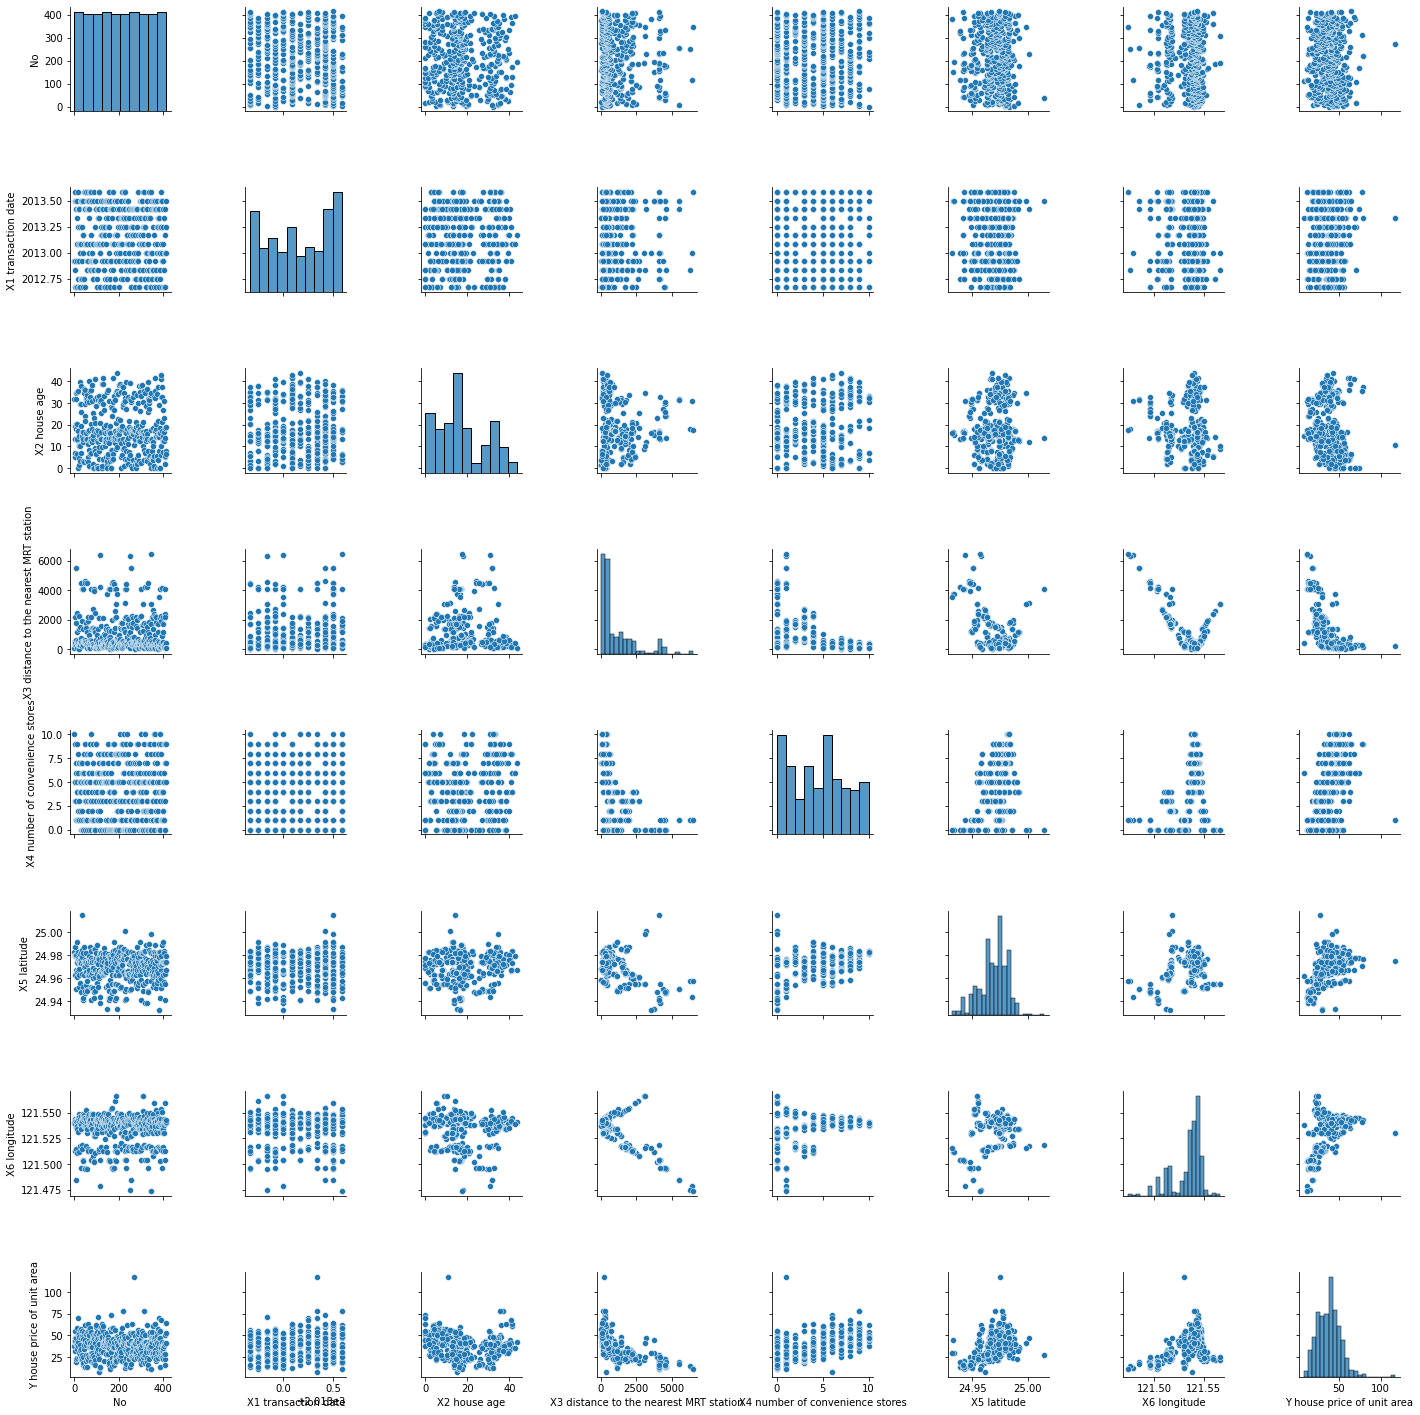

In [ ]:
# Getting an idea of the patterns of the data, 
# to see if whether we can identify some trends from the data
## negative correlation which is the distance to the train column last plot
sns.pairplot(housingdata)

# Normalization (Data preparation)

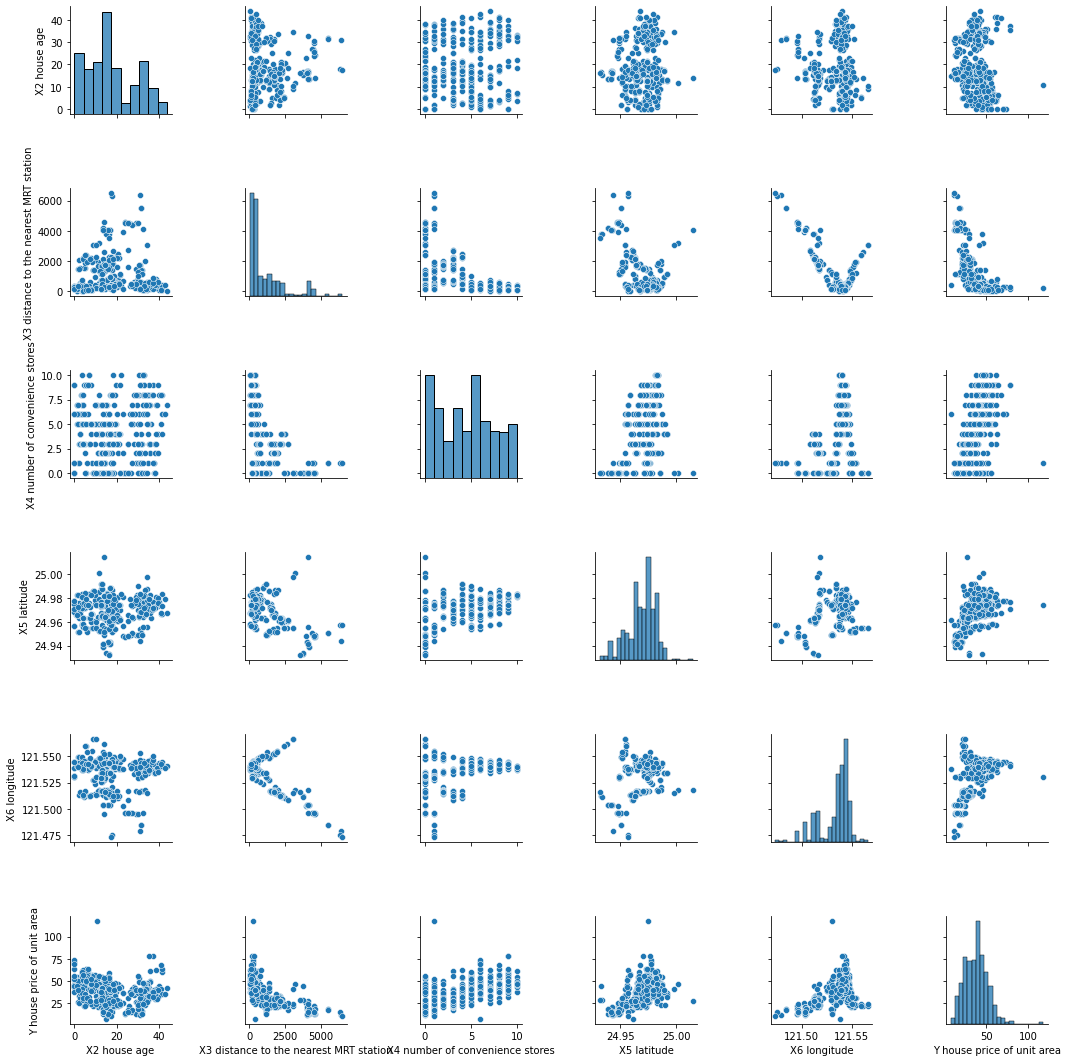

In [ ]:
# Correlation plots
##Feature selecting out transaction date and No. column
##since we are not taking time into account
sns.pairplot(housingdata.iloc[:,2:])

In [ ]:
#Summary statistics on numeric columns (removing No column- only an ID)
#Also removing transaction date
housingdata.iloc[:,2:].describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
#Getting non-null values from dataset, to make sure there no blank cells
## Null Values: Missing values, could be a sign of poor data quality
## Could also be information within itself

# there are 414 rows of non-null data in each feature, which means no blank cell in this dataset
# if there is we need to decide whether to remove them or not
housingdata.iloc[:,2:].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   X5 latitude                             414 non-null    float64
 4   X6 longitude                            414 non-null    float64
 5   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


In [ ]:
# normalize the input data, scale all of numbers to a value between 0 and 1
# do not need to normalize the output data
from sklearn import preprocessing
housingdata_norm = preprocessing.normalize(housingdata.iloc[:, 2:])
housingdata_norm = pd.DataFrame(housingdata_norm)
housingdata_norm

,0,1,2,3,4,5
0,0.201737,0.535100,0.063043,0.157500,0.766225,0.238933
1,0.058362,0.917610,0.026936,0.074764,0.363757,0.126301
2,0.023025,0.972905,0.008656,0.043258,0.210416,0.081886
3,0.022999,0.971790,0.008646,0.043209,0.210175,0.094761
4,0.012132,0.947692,0.012132,0.060611,0.294916,0.104580
...,...,...,...,...,...,...
409,0.003355,0.999526,0.000000,0.006107,0.029752,0.003771
410,0.034603,0.558934,0.055612,0.154318,0.751023,0.308954
411,0.045556,0.947394,0.016962,0.060529,0.294514,0.098382
412,0.047379,0.613066,0.029247,0.146038,0.710928,0.307088


In [ ]:
housingdata.iloc[:,2:].columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [ ]:
# code to place the header columns in the normalized dataset
housingdata_norm.columns=housingdata.iloc[:,2:].columns
housingdata_norm

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0.201737,0.535100,0.063043,0.157500,0.766225,0.238933
1,0.058362,0.917610,0.026936,0.074764,0.363757,0.126301
2,0.023025,0.972905,0.008656,0.043258,0.210416,0.081886
3,0.022999,0.971790,0.008646,0.043209,0.210175,0.094761
4,0.012132,0.947692,0.012132,0.060611,0.294916,0.104580
...,...,...,...,...,...,...
409,0.003355,0.999526,0.000000,0.006107,0.029752,0.003771
410,0.034603,0.558934,0.055612,0.154318,0.751023,0.308954
411,0.045556,0.947394,0.016962,0.060529,0.294514,0.098382
412,0.047379,0.613066,0.029247,0.146038,0.710928,0.307088


In [ ]:
#we do not need to normalize out output/target variable
housingdata_norm['Y house price of unit area'] = housingdata['Y house price of unit area']
housingdata_norm

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0.201737,0.535100,0.063043,0.157500,0.766225,37.9
1,0.058362,0.917610,0.026936,0.074764,0.363757,42.2
2,0.023025,0.972905,0.008656,0.043258,0.210416,47.3
3,0.022999,0.971790,0.008646,0.043209,0.210175,54.8
4,0.012132,0.947692,0.012132,0.060611,0.294916,43.1
...,...,...,...,...,...,...
409,0.003355,0.999526,0.000000,0.006107,0.029752,15.4
410,0.034603,0.558934,0.055612,0.154318,0.751023,50.0
411,0.045556,0.947394,0.016962,0.060529,0.294514,40.6
412,0.047379,0.613066,0.029247,0.146038,0.710928,52.5


**Once the inputs are normally distributed, it's easier for the model to preocess the information and find out the relationship between these inputs and the output**

note: it is also common to use logarithm instead of normalization when doing money values.

In [ ]:
# splitting inputs x (train set) and ouputs y (test set). Also getting rid of 
x = housingdata_norm.iloc[:, :5]
x

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,0.201737,0.535100,0.063043,0.157500,0.766225
1,0.058362,0.917610,0.026936,0.074764,0.363757
2,0.023025,0.972905,0.008656,0.043258,0.210416
3,0.022999,0.971790,0.008646,0.043209,0.210175
4,0.012132,0.947692,0.012132,0.060611,0.294916
...,...,...,...,...,...
409,0.003355,0.999526,0.000000,0.006107,0.029752
410,0.034603,0.558934,0.055612,0.154318,0.751023
411,0.045556,0.947394,0.016962,0.060529,0.294514
412,0.047379,0.613066,0.029247,0.146038,0.710928


In [ ]:
y=housingdata_norm.iloc[:,5:6]
y

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


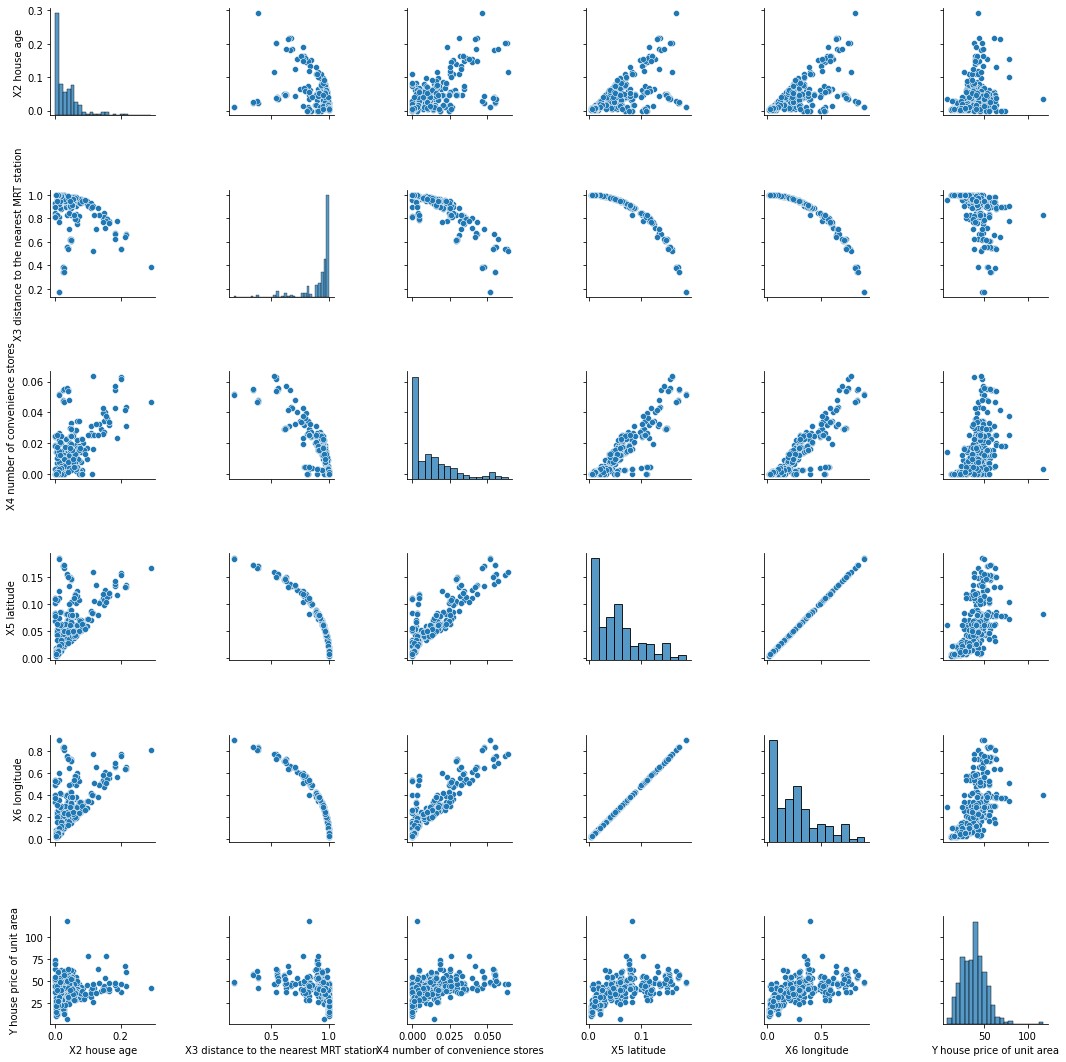

In [ ]:
#correlation plot for normalized data:
# after normalization, we can see a much clearer picture
sns.pairplot(housingdata_norm)

In [ ]:
#In case you wanted the correlations in a table form
housingdata_norm.corr()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X2 house age,1.000000,-0.421179,0.556401,0.537865,0.537767,0.277851
X3 distance to the nearest MRT station,-0.421179,1.000000,-0.858782,-0.908956,-0.909024,-0.509469
X4 number of convenience stores,0.556401,-0.858782,1.000000,0.877750,0.877721,0.579531
X5 latitude,0.537865,-0.908956,0.877750,1.000000,1.000000,0.662669
X6 longitude,0.537767,-0.909024,0.877721,1.000000,1.000000,0.662566
Y house price of unit area,0.277851,-0.509469,0.579531,0.662669,0.662566,1.000000


# Train-Test Split (Validation)

In [ ]:
#A common train-test split is 20% of the data for the test set, which is also known as an 80/20 train test split
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.2,random_state=55)
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

x_train (331, 5)
x_test (83, 5)
y_train (331, 1)
y_test (83, 1)


# Linear Regression (Algorithm)
Now we can apply the algorithm on the training data to train the model, and then we'll use the train model on the testing data to validate the model performance.

In this example, we are using a linear regression algorithm because we wanna explain how the change of features such as house age, the distance to train, etc. affect the house price.

In [ ]:
#Sets up the linear regression model
from sklearn import linear_model

lm = linear_model.LinearRegression(fit_intercept=True)
#Trains the linear regression algorithm on the training dataset
model = lm.fit(x_train,y_train)

The linear regression model boils down to the formula y = mx + b. The slope (m) are the coefficent values, while
the intercept (b) explains where the line would start if the slopes were 0.

In [ ]:
#Intercept value
model.intercept_

array([-34.91939464])

In [ ]:
# each feature has its own Coefficent values, since they affect the house price differently
coeff_df = pd.DataFrame(model.coef_.T, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
X2 house age,-86.382891
X3 distance to the nearest MRT station,58.368546
X4 number of convenience stores,200.712176
X5 latitude,104529.407984
X6 longitude,-21403.405846


The coefficient tells us how much we can expect a house price of the unit area to change. 

Since we have multiple coefficients from different features, the final linear regression formula would include all these variables.

In [ ]:
#Display more data on linear regression
from statsmodels import regression
import statsmodels.api as sm
import numpy as np
def linreg(X,Y):
 # Running the linear regression
 X = sm.add_constant(X)
 model = regression.linear_model.OLS(Y, X).fit()
 a = model.params[0]
 b = model.params[1]
 X = X[:, 1]
 return model.summary()
 
linreg(x_train.values, y_train.values)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     74.73
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           6.07e-52
Time:                        16:44:29   Log-Likelihood:                -1212.0
No. Observations:                 331   AIC:                             2436.
Df Residuals:                     325   BIC:                             2459.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.9194     10.999     -3.175      0.002     -56.558     -13.280
x1           -86.3829     15.386     -5.614      0.000    -116.652     -56.113
x2            58.3685     10.411      5.606      0.000      37.887      78.850
x3           200.7122     82.604      2.430      0.016      38.207     363.218
x4          1.045e+05   2.62e+04      3.993      0.000     5.3e+04    1.56e+05
x5          -2.14e+04   5379.895     -3.978      0.000    -3.2e+04   -1.08e+04
==============================================================================
Omnibus:                      186.472   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2673.807
Skew:                           1.999   Prob(JB):                         0.00
Kurtosis:                      16.338   Cond. No.                     7.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- **F-statistic:** indicates how well the model is in rejection the null hypothesis.
  - A high F-statistic number shows that the model is good at predicting the result. 

- **std err:** standard error represents how far the data points in that feature are from the linear regression line. 
  - Ideally, you would want them all to be very close to the line, so a small number is better.

- **P>|t|:** P value is the esitmated probability of obtaining the test results.
  - A lower value indicates strong evidence against the null hypothesis. Most people said the cut-off at 0.05, also called alpha value.
  - This is the p value for a two tailed test, and normally one wants this value to be as low as possible. 

In [ ]:
#Make predictions of train and test set
pred=lm.predict(x_train)
predd=lm.predict(x_test)

# R2 (Evaluation)

Coefficient of determination

In [ ]:
#checking accuracy using r2:
from sklearn.metrics import r2_score
#Training r2
train_r2_score = r2_score(y_train, pred)
print('Training coefficient of determination:', train_r2_score)

Training coefficient of determination: 0.5348106470660416


In [ ]:
#Test r2
test_r2_score = r2_score(y_test, predd)
print('Test coefficient of determination:', test_r2_score)

Test coefficient of determination: 0.5488671559665579


Both pretty low, usually it's a sign of underfitting.


In [ ]:
#Examining actual values against the predictions of test set
compare = y_test.copy()
compare['predictions'] = predd
compare.head(10)

,Y house price of unit area,predictions
293,42.5,41.657872
84,43.7,41.085185
184,21.8,25.470754
85,50.8,47.571174
231,14.7,24.701607
151,44.7,47.968147
404,41.2,48.068743
67,56.8,50.727744
145,45.5,42.340210
195,34.6,35.410380


We can see that the predicted value is actaully pretty close to the real value.

In [ ]:
from sklearn import metrics
#Training set
print('Train Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_train, pred))
print('Train Mean Squared Error (MSE):', metrics.mean_squared_error(y_train, pred))
#Test set
print('Test Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predd))
print('Test Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predd)) 

Train Mean Absolute Error (MAE): 6.315969043748797
Train Mean Squared Error (MSE): 88.71795847258532
Test Mean Absolute Error (MAE): 5.961437743461353
Test Mean Squared Error (MSE): 69.61245394528389


MAE takes the absolute values of actual minus the predicted values.

MSE is like MAE, but it squares the distance of the actual minus predicted. This means, MSE takes outliers into account by a large factor. 

The MAE of this model is quite low, but the MSE is quite high. It indicates that our model does well with predicting in most cases, but there are a few outliers in this data, probably because of some oddly priced properties that do not fit in the overall trend.

If we compare the two metrics on training and testing data, we can see that both a bit lower on testing data.

When the model performs better on testing data, it's usually an underfit case. So all three evaluation metrics R Squared, MAE, MSE indicate that the model is underfitting.

# Improve
- This is the p value for a two tailed test, and normally one wants this value to be as low as possible. see p value for x3 is 0.016. It's much higher than the p values of other variables. If we go back to the scatter plots, when we did the data normalization, we can see that the plot for feature x3 was a curve instead of a straight line. That means it was a nonlinear feature, which messed up the linear regression model. So we probably want to remove this feature.

- Secondly, we can do more in feature engineering to optimize the data display.

  - e.g. Convert the latitude and longitude values into a more relevant format.
  - Remove the outliers

- Try different algorithm to increase the model complexity.
  - Gradient boosting instead of linear regression to increase the model complexity

- Add more data.

Let's just remove feature x3 here.

In [ ]:
#Removing X3 variable for improvement - Better feature selection
housingdata=pd.read_excel("Real estate valuation data set.xlsx")
housingdata=housingdata.drop(housingdata.columns[3], axis=1)
housingdata_norm=preprocessing.normalize(housingdata.iloc[:,2:])
housingdata_norm=pd.DataFrame(housingdata_norm)
#code to place the header columns in the normalized dataset
housingdata_norm.columns=housingdata.iloc[:,2:].columns
#we do not need to normalize out output/target variable
housingdata_norm['Y house price of unit area'] = housingdata['Y house price of unit area']
#data split
x=housingdata_norm.iloc[:,:4]
y=housingdata_norm.iloc[:,4:5]
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size
=0.2,random_state=55)
#Trains the linear regression algorithm on the training dataset
lm=linear_model.LinearRegression()
model=lm.fit(x_train,y_train)
#Make predictions of train and test set
pred=lm.predict(x_train)
predd=lm.predict(x_test)
#Training r2
train_r2_score = r2_score(y_train,pred)
print('Training coefficient of determination:', train_r2_score)
#Test r2
test_r2_score = r2_score(y_test,predd)
print('Test coefficient of determination:', test_r2_score)
#Training set
print('Train Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_train, pred))
print('Train Mean Squared Error (MSE):', metrics.mean_squared_error(y_train, pred))
#Test set
print('Test Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predd))
print('Test Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predd)) 

Training coefficient of determination: 0.9721139488268009
Test coefficient of determination: 0.9712254065634646
Train Mean Absolute Error (MAE): 1.7631625597348313
Train Mean Squared Error (MSE): 5.318250545384896
Test Mean Absolute Error (MAE): 1.7485062306065744
Test Mean Squared Error (MSE): 4.440089181905381


Remove x3 and split data set and run the same algorithm again, we can see that the R squared on both training and testing data are much higher than before. And at the same time, we get a much lower MAE and MSE on both data sets. So, we improved our model by adding a feature engineering step. 